In [1]:
import pandas as pd
import numpy as np

In [3]:
house = pd.read_csv("/content/Housing.csv") #read the dataset
house

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [4]:
x= house.drop(columns=["price"]) #xvalues
x

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [5]:
y= house["price"]   #yvalues
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [6]:
#preprocessing

In [7]:
#filling the missing values
house = house.fillna(2)

In [8]:
#drop row with the missing values
house = house.dropna()

In [9]:
#interpolate misssing value
house = house.interpolate()

In [10]:
house = house.drop_duplicates()
house

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [11]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'EstimatedSalary' is the column you want to standardize
scaler = StandardScaler()
house['price'] = scaler.fit_transform(house[['price']])


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 40,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linear = LinearRegression()

In [16]:
linear.fit(x_train, y_train)

linear

LinearRegression()

In [28]:
y_pred =linear.predict(x_test)
y_pred

array([7574511.84963309, 6290020.07507541, 7521301.00127655,
       3139365.04962327, 5652804.56307944, 4035350.40011186,
       6002634.55122017, 3017690.8163223 , 5177333.3528498 ,
       3346144.68732419, 7590589.34556524, 3857233.31104692,
       3583554.3787957 , 3328120.70869456, 6685820.64161457,
       2566463.81811072, 4313521.13963577, 6399491.64797589,
       4630371.19211492, 3115038.03342316, 4009277.16229759,
       4137371.55570544, 3421514.78566291, 4122441.43950971,
       3236673.1144237 , 3045970.97265493, 3569262.25677814,
       6186630.25622495, 3240587.10225579, 4399264.53821389,
       3711049.93032581, 6625003.1011143 , 6393481.02474502,
       3781211.38542158, 6384287.26285083, 3583554.3787957 ,
       4528085.10111925, 5278352.26737213, 4475404.45793174,
       3401101.75729489, 5968196.30870285, 3920596.17612241,
       6336771.61102464, 4245596.95902276, 6000641.20524933,
       4818684.2841453 , 3374385.69135639, 7292721.52654047,
       5803857.30943053,

In [30]:
house_data = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(house_data)

       Actual     Predicted
42    7700000  7.574512e+06
62    7070000  6.290020e+06
0    13300000  7.521301e+06
422   3360000  3.139365e+06
112   6083000  5.652805e+06
..        ...           ...
506   2604000  2.893054e+06
223   4760000  4.964794e+06
257   4480000  4.678922e+06
421   3360000  3.452575e+06
3    12215000  7.415900e+06

[109 rows x 2 columns]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [32]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1022587.33
Mean squared error: 2037689969878.02
Root mean squared error: 1427476.78


In [20]:
from sklearn.ensemble import RandomForestRegressor
# Initialize models
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
from sklearn.metrics import r2_score
#find the mean_squared_Error
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [38]:
print(f"Random Forest - MSE: {mse_rf}")
print(f"R²: {r2_rf}")

Random Forest - MSE: 2037689969878.0151
R²: 0.5262296983621964


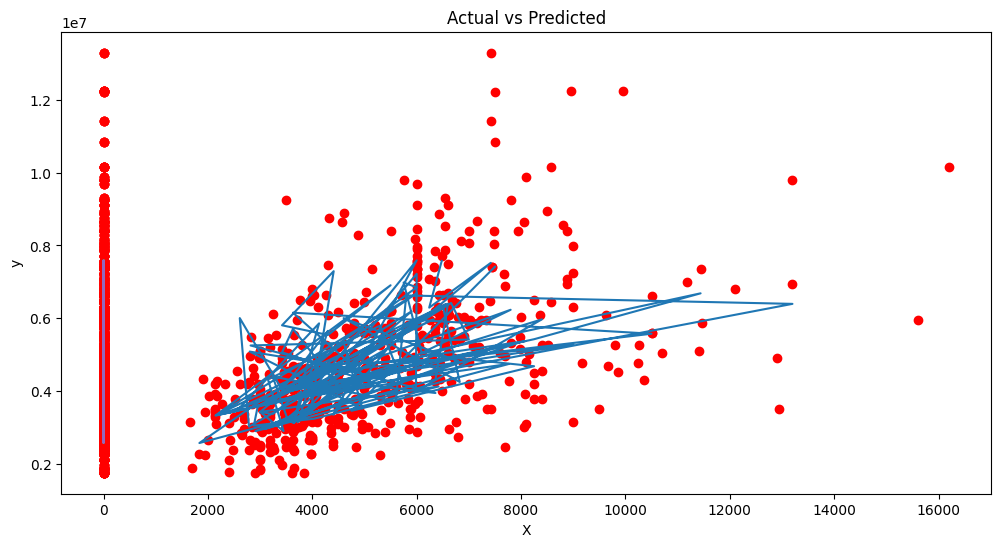

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(x,y,'ro')     # regression line
plt.plot(x_test,y_pred)   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [49]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
forest_params

[{'max_depth': [10, 11, 12, 13, 14],
  'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}]

In [50]:
from sklearn.model_selection import GridSearchCV

In [55]:
clf = GridSearchCV(rf_model, forest_params, cv = 10, scoring='accuracy')